In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#read the dataset:
df=pd.read_csv("C:/Amazon music clustering/single_genre_artists.csv") 

In [4]:
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [5]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [6]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [7]:
df.shape

(95837, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [9]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [10]:
#convert the datatype:
df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')

In [11]:
#Feature selection:
features=['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms']

In [12]:
X=df[features]
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,161427
1,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,223440
2,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,208267
3,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,161933
4,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,167973
...,...,...,...,...,...,...,...,...,...,...
95832,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,174800
95833,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,265846
95834,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,82500
95835,0.562,0.0331,-25.551,0.1030,0.996,0.961000,0.1110,0.386,63.696,185250


In [16]:
#Scaling the features:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [17]:
#Apply PCA :
pca=PCA(n_components=5)
X_pca=pca.fit_transform(X_scaled)

print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Shape before PCA: (95837, 10)
Shape after PCA: (95837, 5)
Explained variance ratio: [0.27079553 0.18821441 0.11553636 0.09363373 0.09016825]
Total variance explained: 0.7583482837230485


K value =  1 Inertia value =  958369.9999999974
K value =  2 Inertia value =  778813.5948784563
K value =  3 Inertia value =  658335.9621683134
K value =  4 Inertia value =  593031.0894267308
K value =  5 Inertia value =  548600.501775251
K value =  6 Inertia value =  521625.87326266465
K value =  7 Inertia value =  494731.1676736134
K value =  8 Inertia value =  470850.5503293444
K value =  9 Inertia value =  449763.5563350059


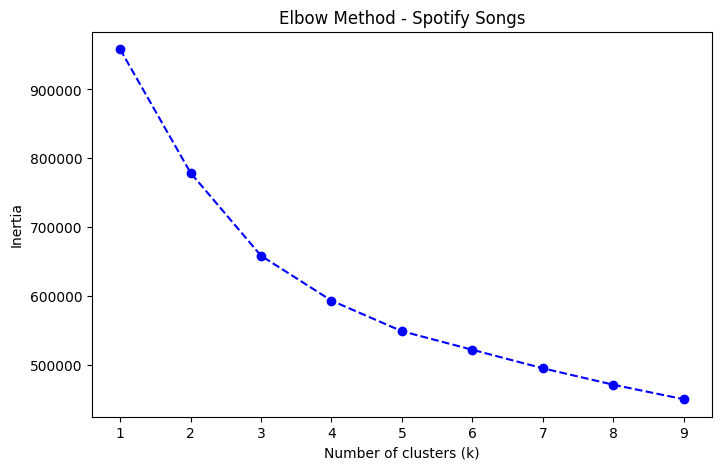

In [18]:
#Elbow method---To find the K optimal value:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print('K value = ', k, 'Inertia value = ', kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Spotify Songs")
plt.xticks(K)
plt.show()

In [19]:
#Apply Kmeans Clustering:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster']=kmeans.fit_predict(X_scaled)

In [20]:
#Evaluate Clusters ---
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.242


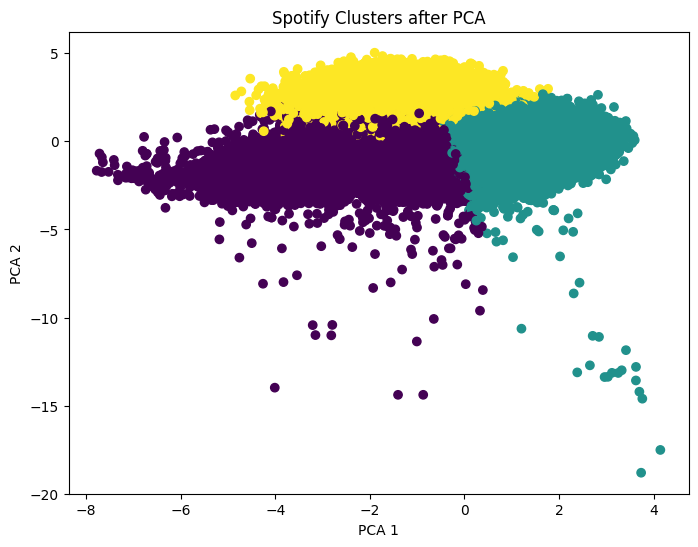

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["cluster"], cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Spotify Clusters after PCA")
plt.show()

#Insights:
#cluster 0:energy low+high acousticness---Chill Acousticness
#cluster 1:dance+High energy+High tempo+High valence---Party track
#cluster 2:High dance+medium energy+high speechiness+high liveness----rap song,live recordings or spoken word content

In [22]:
#To find the average of cluster:
cluster_summary = df.groupby("cluster")[features].mean()
print(cluster_summary)

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.486242  0.311018 -13.208988     0.060103      0.749539   
1            0.627309  0.693465  -7.608616     0.075061      0.258713   
2            0.664254  0.466617 -13.364383     0.829908      0.585922   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.168760  0.182065  0.413047  111.933323  223500.904818  
1                0.050681  0.199854  0.666324  124.905464  226568.204680  
2                0.001384  0.435498  0.584036  100.387090   97522.338234  


In [25]:
# Save the DataFrame with clustering results to a CSV file
df.to_csv('clustered_data.csv',index=False)